In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

import cv2
import numpy as np

from src.models.modnet import MODNet

In [51]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

In [66]:
img = cv2.imread('/home/ubuntu/data/yong/projects/MODNet/jk01.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.resize(img, (512, 512), interpolation=cv2.INTER_LINEAR)

In [68]:
img[0:55, :].shape

(55, 512, 3)

In [53]:
img = torch.from_numpy(img.astype(np.float32)).permute(2, 0, 1)

img = img / 255.0
img = normalize(img)

In [73]:
img[0:511].shape

(511, 512, 3)

In [58]:
modnet = MODNet(backbone_pretrained=False)
modnet = nn.DataParallel(modnet)

In [59]:
modnet = modnet.cuda()
modnet.load_state_dict(torch.load('/home/ubuntu/data/yong/projects/MODNet/pretrained/mobilenetv2_human_seg.ckpt'))

RuntimeError: Error(s) in loading state_dict for DataParallel:
	Missing key(s) in state_dict: "module.backbone.model.features.0.0.weight", "module.backbone.model.features.0.1.weight", "module.backbone.model.features.0.1.bias", "module.backbone.model.features.0.1.running_mean", "module.backbone.model.features.0.1.running_var", "module.backbone.model.features.1.conv.0.weight", "module.backbone.model.features.1.conv.1.weight", "module.backbone.model.features.1.conv.1.bias", "module.backbone.model.features.1.conv.1.running_mean", "module.backbone.model.features.1.conv.1.running_var", "module.backbone.model.features.1.conv.3.weight", "module.backbone.model.features.1.conv.4.weight", "module.backbone.model.features.1.conv.4.bias", "module.backbone.model.features.1.conv.4.running_mean", "module.backbone.model.features.1.conv.4.running_var", "module.backbone.model.features.2.conv.0.weight", "module.backbone.model.features.2.conv.1.weight", "module.backbone.model.features.2.conv.1.bias", "module.backbone.model.features.2.conv.1.running_mean", "module.backbone.model.features.2.conv.1.running_var", "module.backbone.model.features.2.conv.3.weight", "module.backbone.model.features.2.conv.4.weight", "module.backbone.model.features.2.conv.4.bias", "module.backbone.model.features.2.conv.4.running_mean", "module.backbone.model.features.2.conv.4.running_var", "module.backbone.model.features.2.conv.6.weight", "module.backbone.model.features.2.conv.7.weight", "module.backbone.model.features.2.conv.7.bias", "module.backbone.model.features.2.conv.7.running_mean", "module.backbone.model.features.2.conv.7.running_var", "module.backbone.model.features.3.conv.0.weight", "module.backbone.model.features.3.conv.1.weight", "module.backbone.model.features.3.conv.1.bias", "module.backbone.model.features.3.conv.1.running_mean", "module.backbone.model.features.3.conv.1.running_var", "module.backbone.model.features.3.conv.3.weight", "module.backbone.model.features.3.conv.4.weight", "module.backbone.model.features.3.conv.4.bias", "module.backbone.model.features.3.conv.4.running_mean", "module.backbone.model.features.3.conv.4.running_var", "module.backbone.model.features.3.conv.6.weight", "module.backbone.model.features.3.conv.7.weight", "module.backbone.model.features.3.conv.7.bias", "module.backbone.model.features.3.conv.7.running_mean", "module.backbone.model.features.3.conv.7.running_var", "module.backbone.model.features.4.conv.0.weight", "module.backbone.model.features.4.conv.1.weight", "module.backbone.model.features.4.conv.1.bias", "module.backbone.model.features.4.conv.1.running_mean", "module.backbone.model.features.4.conv.1.running_var", "module.backbone.model.features.4.conv.3.weight", "module.backbone.model.features.4.conv.4.weight", "module.backbone.model.features.4.conv.4.bias", "module.backbone.model.features.4.conv.4.running_mean", "module.backbone.model.features.4.conv.4.running_var", "module.backbone.model.features.4.conv.6.weight", "module.backbone.model.features.4.conv.7.weight", "module.backbone.model.features.4.conv.7.bias", "module.backbone.model.features.4.conv.7.running_mean", "module.backbone.model.features.4.conv.7.running_var", "module.backbone.model.features.5.conv.0.weight", "module.backbone.model.features.5.conv.1.weight", "module.backbone.model.features.5.conv.1.bias", "module.backbone.model.features.5.conv.1.running_mean", "module.backbone.model.features.5.conv.1.running_var", "module.backbone.model.features.5.conv.3.weight", "module.backbone.model.features.5.conv.4.weight", "module.backbone.model.features.5.conv.4.bias", "module.backbone.model.features.5.conv.4.running_mean", "module.backbone.model.features.5.conv.4.running_var", "module.backbone.model.features.5.conv.6.weight", "module.backbone.model.features.5.conv.7.weight", "module.backbone.model.features.5.conv.7.bias", "module.backbone.model.features.5.conv.7.running_mean", "module.backbone.model.features.5.conv.7.running_var", "module.backbone.model.features.6.conv.0.weight", "module.backbone.model.features.6.conv.1.weight", "module.backbone.model.features.6.conv.1.bias", "module.backbone.model.features.6.conv.1.running_mean", "module.backbone.model.features.6.conv.1.running_var", "module.backbone.model.features.6.conv.3.weight", "module.backbone.model.features.6.conv.4.weight", "module.backbone.model.features.6.conv.4.bias", "module.backbone.model.features.6.conv.4.running_mean", "module.backbone.model.features.6.conv.4.running_var", "module.backbone.model.features.6.conv.6.weight", "module.backbone.model.features.6.conv.7.weight", "module.backbone.model.features.6.conv.7.bias", "module.backbone.model.features.6.conv.7.running_mean", "module.backbone.model.features.6.conv.7.running_var", "module.backbone.model.features.7.conv.0.weight", "module.backbone.model.features.7.conv.1.weight", "module.backbone.model.features.7.conv.1.bias", "module.backbone.model.features.7.conv.1.running_mean", "module.backbone.model.features.7.conv.1.running_var", "module.backbone.model.features.7.conv.3.weight", "module.backbone.model.features.7.conv.4.weight", "module.backbone.model.features.7.conv.4.bias", "module.backbone.model.features.7.conv.4.running_mean", "module.backbone.model.features.7.conv.4.running_var", "module.backbone.model.features.7.conv.6.weight", "module.backbone.model.features.7.conv.7.weight", "module.backbone.model.features.7.conv.7.bias", "module.backbone.model.features.7.conv.7.running_mean", "module.backbone.model.features.7.conv.7.running_var", "module.backbone.model.features.8.conv.0.weight", "module.backbone.model.features.8.conv.1.weight", "module.backbone.model.features.8.conv.1.bias", "module.backbone.model.features.8.conv.1.running_mean", "module.backbone.model.features.8.conv.1.running_var", "module.backbone.model.features.8.conv.3.weight", "module.backbone.model.features.8.conv.4.weight", "module.backbone.model.features.8.conv.4.bias", "module.backbone.model.features.8.conv.4.running_mean", "module.backbone.model.features.8.conv.4.running_var", "module.backbone.model.features.8.conv.6.weight", "module.backbone.model.features.8.conv.7.weight", "module.backbone.model.features.8.conv.7.bias", "module.backbone.model.features.8.conv.7.running_mean", "module.backbone.model.features.8.conv.7.running_var", "module.backbone.model.features.9.conv.0.weight", "module.backbone.model.features.9.conv.1.weight", "module.backbone.model.features.9.conv.1.bias", "module.backbone.model.features.9.conv.1.running_mean", "module.backbone.model.features.9.conv.1.running_var", "module.backbone.model.features.9.conv.3.weight", "module.backbone.model.features.9.conv.4.weight", "module.backbone.model.features.9.conv.4.bias", "module.backbone.model.features.9.conv.4.running_mean", "module.backbone.model.features.9.conv.4.running_var", "module.backbone.model.features.9.conv.6.weight", "module.backbone.model.features.9.conv.7.weight", "module.backbone.model.features.9.conv.7.bias", "module.backbone.model.features.9.conv.7.running_mean", "module.backbone.model.features.9.conv.7.running_var", "module.backbone.model.features.10.conv.0.weight", "module.backbone.model.features.10.conv.1.weight", "module.backbone.model.features.10.conv.1.bias", "module.backbone.model.features.10.conv.1.running_mean", "module.backbone.model.features.10.conv.1.running_var", "module.backbone.model.features.10.conv.3.weight", "module.backbone.model.features.10.conv.4.weight", "module.backbone.model.features.10.conv.4.bias", "module.backbone.model.features.10.conv.4.running_mean", "module.backbone.model.features.10.conv.4.running_var", "module.backbone.model.features.10.conv.6.weight", "module.backbone.model.features.10.conv.7.weight", "module.backbone.model.features.10.conv.7.bias", "module.backbone.model.features.10.conv.7.running_mean", "module.backbone.model.features.10.conv.7.running_var", "module.backbone.model.features.11.conv.0.weight", "module.backbone.model.features.11.conv.1.weight", "module.backbone.model.features.11.conv.1.bias", "module.backbone.model.features.11.conv.1.running_mean", "module.backbone.model.features.11.conv.1.running_var", "module.backbone.model.features.11.conv.3.weight", "module.backbone.model.features.11.conv.4.weight", "module.backbone.model.features.11.conv.4.bias", "module.backbone.model.features.11.conv.4.running_mean", "module.backbone.model.features.11.conv.4.running_var", "module.backbone.model.features.11.conv.6.weight", "module.backbone.model.features.11.conv.7.weight", "module.backbone.model.features.11.conv.7.bias", "module.backbone.model.features.11.conv.7.running_mean", "module.backbone.model.features.11.conv.7.running_var", "module.backbone.model.features.12.conv.0.weight", "module.backbone.model.features.12.conv.1.weight", "module.backbone.model.features.12.conv.1.bias", "module.backbone.model.features.12.conv.1.running_mean", "module.backbone.model.features.12.conv.1.running_var", "module.backbone.model.features.12.conv.3.weight", "module.backbone.model.features.12.conv.4.weight", "module.backbone.model.features.12.conv.4.bias", "module.backbone.model.features.12.conv.4.running_mean", "module.backbone.model.features.12.conv.4.running_var", "module.backbone.model.features.12.conv.6.weight", "module.backbone.model.features.12.conv.7.weight", "module.backbone.model.features.12.conv.7.bias", "module.backbone.model.features.12.conv.7.running_mean", "module.backbone.model.features.12.conv.7.running_var", "module.backbone.model.features.13.conv.0.weight", "module.backbone.model.features.13.conv.1.weight", "module.backbone.model.features.13.conv.1.bias", "module.backbone.model.features.13.conv.1.running_mean", "module.backbone.model.features.13.conv.1.running_var", "module.backbone.model.features.13.conv.3.weight", "module.backbone.model.features.13.conv.4.weight", "module.backbone.model.features.13.conv.4.bias", "module.backbone.model.features.13.conv.4.running_mean", "module.backbone.model.features.13.conv.4.running_var", "module.backbone.model.features.13.conv.6.weight", "module.backbone.model.features.13.conv.7.weight", "module.backbone.model.features.13.conv.7.bias", "module.backbone.model.features.13.conv.7.running_mean", "module.backbone.model.features.13.conv.7.running_var", "module.backbone.model.features.14.conv.0.weight", "module.backbone.model.features.14.conv.1.weight", "module.backbone.model.features.14.conv.1.bias", "module.backbone.model.features.14.conv.1.running_mean", "module.backbone.model.features.14.conv.1.running_var", "module.backbone.model.features.14.conv.3.weight", "module.backbone.model.features.14.conv.4.weight", "module.backbone.model.features.14.conv.4.bias", "module.backbone.model.features.14.conv.4.running_mean", "module.backbone.model.features.14.conv.4.running_var", "module.backbone.model.features.14.conv.6.weight", "module.backbone.model.features.14.conv.7.weight", "module.backbone.model.features.14.conv.7.bias", "module.backbone.model.features.14.conv.7.running_mean", "module.backbone.model.features.14.conv.7.running_var", "module.backbone.model.features.15.conv.0.weight", "module.backbone.model.features.15.conv.1.weight", "module.backbone.model.features.15.conv.1.bias", "module.backbone.model.features.15.conv.1.running_mean", "module.backbone.model.features.15.conv.1.running_var", "module.backbone.model.features.15.conv.3.weight", "module.backbone.model.features.15.conv.4.weight", "module.backbone.model.features.15.conv.4.bias", "module.backbone.model.features.15.conv.4.running_mean", "module.backbone.model.features.15.conv.4.running_var", "module.backbone.model.features.15.conv.6.weight", "module.backbone.model.features.15.conv.7.weight", "module.backbone.model.features.15.conv.7.bias", "module.backbone.model.features.15.conv.7.running_mean", "module.backbone.model.features.15.conv.7.running_var", "module.backbone.model.features.16.conv.0.weight", "module.backbone.model.features.16.conv.1.weight", "module.backbone.model.features.16.conv.1.bias", "module.backbone.model.features.16.conv.1.running_mean", "module.backbone.model.features.16.conv.1.running_var", "module.backbone.model.features.16.conv.3.weight", "module.backbone.model.features.16.conv.4.weight", "module.backbone.model.features.16.conv.4.bias", "module.backbone.model.features.16.conv.4.running_mean", "module.backbone.model.features.16.conv.4.running_var", "module.backbone.model.features.16.conv.6.weight", "module.backbone.model.features.16.conv.7.weight", "module.backbone.model.features.16.conv.7.bias", "module.backbone.model.features.16.conv.7.running_mean", "module.backbone.model.features.16.conv.7.running_var", "module.backbone.model.features.17.conv.0.weight", "module.backbone.model.features.17.conv.1.weight", "module.backbone.model.features.17.conv.1.bias", "module.backbone.model.features.17.conv.1.running_mean", "module.backbone.model.features.17.conv.1.running_var", "module.backbone.model.features.17.conv.3.weight", "module.backbone.model.features.17.conv.4.weight", "module.backbone.model.features.17.conv.4.bias", "module.backbone.model.features.17.conv.4.running_mean", "module.backbone.model.features.17.conv.4.running_var", "module.backbone.model.features.17.conv.6.weight", "module.backbone.model.features.17.conv.7.weight", "module.backbone.model.features.17.conv.7.bias", "module.backbone.model.features.17.conv.7.running_mean", "module.backbone.model.features.17.conv.7.running_var", "module.backbone.model.features.18.0.weight", "module.backbone.model.features.18.1.weight", "module.backbone.model.features.18.1.bias", "module.backbone.model.features.18.1.running_mean", "module.backbone.model.features.18.1.running_var", "module.lr_branch.backbone.model.features.0.0.weight", "module.lr_branch.backbone.model.features.0.1.weight", "module.lr_branch.backbone.model.features.0.1.bias", "module.lr_branch.backbone.model.features.0.1.running_mean", "module.lr_branch.backbone.model.features.0.1.running_var", "module.lr_branch.backbone.model.features.1.conv.0.weight", "module.lr_branch.backbone.model.features.1.conv.1.weight", "module.lr_branch.backbone.model.features.1.conv.1.bias", "module.lr_branch.backbone.model.features.1.conv.1.running_mean", "module.lr_branch.backbone.model.features.1.conv.1.running_var", "module.lr_branch.backbone.model.features.1.conv.3.weight", "module.lr_branch.backbone.model.features.1.conv.4.weight", "module.lr_branch.backbone.model.features.1.conv.4.bias", "module.lr_branch.backbone.model.features.1.conv.4.running_mean", "module.lr_branch.backbone.model.features.1.conv.4.running_var", "module.lr_branch.backbone.model.features.2.conv.0.weight", "module.lr_branch.backbone.model.features.2.conv.1.weight", "module.lr_branch.backbone.model.features.2.conv.1.bias", "module.lr_branch.backbone.model.features.2.conv.1.running_mean", "module.lr_branch.backbone.model.features.2.conv.1.running_var", "module.lr_branch.backbone.model.features.2.conv.3.weight", "module.lr_branch.backbone.model.features.2.conv.4.weight", "module.lr_branch.backbone.model.features.2.conv.4.bias", "module.lr_branch.backbone.model.features.2.conv.4.running_mean", "module.lr_branch.backbone.model.features.2.conv.4.running_var", "module.lr_branch.backbone.model.features.2.conv.6.weight", "module.lr_branch.backbone.model.features.2.conv.7.weight", "module.lr_branch.backbone.model.features.2.conv.7.bias", "module.lr_branch.backbone.model.features.2.conv.7.running_mean", "module.lr_branch.backbone.model.features.2.conv.7.running_var", "module.lr_branch.backbone.model.features.3.conv.0.weight", "module.lr_branch.backbone.model.features.3.conv.1.weight", "module.lr_branch.backbone.model.features.3.conv.1.bias", "module.lr_branch.backbone.model.features.3.conv.1.running_mean", "module.lr_branch.backbone.model.features.3.conv.1.running_var", "module.lr_branch.backbone.model.features.3.conv.3.weight", "module.lr_branch.backbone.model.features.3.conv.4.weight", "module.lr_branch.backbone.model.features.3.conv.4.bias", "module.lr_branch.backbone.model.features.3.conv.4.running_mean", "module.lr_branch.backbone.model.features.3.conv.4.running_var", "module.lr_branch.backbone.model.features.3.conv.6.weight", "module.lr_branch.backbone.model.features.3.conv.7.weight", "module.lr_branch.backbone.model.features.3.conv.7.bias", "module.lr_branch.backbone.model.features.3.conv.7.running_mean", "module.lr_branch.backbone.model.features.3.conv.7.running_var", "module.lr_branch.backbone.model.features.4.conv.0.weight", "module.lr_branch.backbone.model.features.4.conv.1.weight", "module.lr_branch.backbone.model.features.4.conv.1.bias", "module.lr_branch.backbone.model.features.4.conv.1.running_mean", "module.lr_branch.backbone.model.features.4.conv.1.running_var", "module.lr_branch.backbone.model.features.4.conv.3.weight", "module.lr_branch.backbone.model.features.4.conv.4.weight", "module.lr_branch.backbone.model.features.4.conv.4.bias", "module.lr_branch.backbone.model.features.4.conv.4.running_mean", "module.lr_branch.backbone.model.features.4.conv.4.running_var", "module.lr_branch.backbone.model.features.4.conv.6.weight", "module.lr_branch.backbone.model.features.4.conv.7.weight", "module.lr_branch.backbone.model.features.4.conv.7.bias", "module.lr_branch.backbone.model.features.4.conv.7.running_mean", "module.lr_branch.backbone.model.features.4.conv.7.running_var", "module.lr_branch.backbone.model.features.5.conv.0.weight", "module.lr_branch.backbone.model.features.5.conv.1.weight", "module.lr_branch.backbone.model.features.5.conv.1.bias", "module.lr_branch.backbone.model.features.5.conv.1.running_mean", "module.lr_branch.backbone.model.features.5.conv.1.running_var", "module.lr_branch.backbone.model.features.5.conv.3.weight", "module.lr_branch.backbone.model.features.5.conv.4.weight", "module.lr_branch.backbone.model.features.5.conv.4.bias", "module.lr_branch.backbone.model.features.5.conv.4.running_mean", "module.lr_branch.backbone.model.features.5.conv.4.running_var", "module.lr_branch.backbone.model.features.5.conv.6.weight", "module.lr_branch.backbone.model.features.5.conv.7.weight", "module.lr_branch.backbone.model.features.5.conv.7.bias", "module.lr_branch.backbone.model.features.5.conv.7.running_mean", "module.lr_branch.backbone.model.features.5.conv.7.running_var", "module.lr_branch.backbone.model.features.6.conv.0.weight", "module.lr_branch.backbone.model.features.6.conv.1.weight", "module.lr_branch.backbone.model.features.6.conv.1.bias", "module.lr_branch.backbone.model.features.6.conv.1.running_mean", "module.lr_branch.backbone.model.features.6.conv.1.running_var", "module.lr_branch.backbone.model.features.6.conv.3.weight", "module.lr_branch.backbone.model.features.6.conv.4.weight", "module.lr_branch.backbone.model.features.6.conv.4.bias", "module.lr_branch.backbone.model.features.6.conv.4.running_mean", "module.lr_branch.backbone.model.features.6.conv.4.running_var", "module.lr_branch.backbone.model.features.6.conv.6.weight", "module.lr_branch.backbone.model.features.6.conv.7.weight", "module.lr_branch.backbone.model.features.6.conv.7.bias", "module.lr_branch.backbone.model.features.6.conv.7.running_mean", "module.lr_branch.backbone.model.features.6.conv.7.running_var", "module.lr_branch.backbone.model.features.7.conv.0.weight", "module.lr_branch.backbone.model.features.7.conv.1.weight", "module.lr_branch.backbone.model.features.7.conv.1.bias", "module.lr_branch.backbone.model.features.7.conv.1.running_mean", "module.lr_branch.backbone.model.features.7.conv.1.running_var", "module.lr_branch.backbone.model.features.7.conv.3.weight", "module.lr_branch.backbone.model.features.7.conv.4.weight", "module.lr_branch.backbone.model.features.7.conv.4.bias", "module.lr_branch.backbone.model.features.7.conv.4.running_mean", "module.lr_branch.backbone.model.features.7.conv.4.running_var", "module.lr_branch.backbone.model.features.7.conv.6.weight", "module.lr_branch.backbone.model.features.7.conv.7.weight", "module.lr_branch.backbone.model.features.7.conv.7.bias", "module.lr_branch.backbone.model.features.7.conv.7.running_mean", "module.lr_branch.backbone.model.features.7.conv.7.running_var", "module.lr_branch.backbone.model.features.8.conv.0.weight", "module.lr_branch.backbone.model.features.8.conv.1.weight", "module.lr_branch.backbone.model.features.8.conv.1.bias", "module.lr_branch.backbone.model.features.8.conv.1.running_mean", "module.lr_branch.backbone.model.features.8.conv.1.running_var", "module.lr_branch.backbone.model.features.8.conv.3.weight", "module.lr_branch.backbone.model.features.8.conv.4.weight", "module.lr_branch.backbone.model.features.8.conv.4.bias", "module.lr_branch.backbone.model.features.8.conv.4.running_mean", "module.lr_branch.backbone.model.features.8.conv.4.running_var", "module.lr_branch.backbone.model.features.8.conv.6.weight", "module.lr_branch.backbone.model.features.8.conv.7.weight", "module.lr_branch.backbone.model.features.8.conv.7.bias", "module.lr_branch.backbone.model.features.8.conv.7.running_mean", "module.lr_branch.backbone.model.features.8.conv.7.running_var", "module.lr_branch.backbone.model.features.9.conv.0.weight", "module.lr_branch.backbone.model.features.9.conv.1.weight", "module.lr_branch.backbone.model.features.9.conv.1.bias", "module.lr_branch.backbone.model.features.9.conv.1.running_mean", "module.lr_branch.backbone.model.features.9.conv.1.running_var", "module.lr_branch.backbone.model.features.9.conv.3.weight", "module.lr_branch.backbone.model.features.9.conv.4.weight", "module.lr_branch.backbone.model.features.9.conv.4.bias", "module.lr_branch.backbone.model.features.9.conv.4.running_mean", "module.lr_branch.backbone.model.features.9.conv.4.running_var", "module.lr_branch.backbone.model.features.9.conv.6.weight", "module.lr_branch.backbone.model.features.9.conv.7.weight", "module.lr_branch.backbone.model.features.9.conv.7.bias", "module.lr_branch.backbone.model.features.9.conv.7.running_mean", "module.lr_branch.backbone.model.features.9.conv.7.running_var", "module.lr_branch.backbone.model.features.10.conv.0.weight", "module.lr_branch.backbone.model.features.10.conv.1.weight", "module.lr_branch.backbone.model.features.10.conv.1.bias", "module.lr_branch.backbone.model.features.10.conv.1.running_mean", "module.lr_branch.backbone.model.features.10.conv.1.running_var", "module.lr_branch.backbone.model.features.10.conv.3.weight", "module.lr_branch.backbone.model.features.10.conv.4.weight", "module.lr_branch.backbone.model.features.10.conv.4.bias", "module.lr_branch.backbone.model.features.10.conv.4.running_mean", "module.lr_branch.backbone.model.features.10.conv.4.running_var", "module.lr_branch.backbone.model.features.10.conv.6.weight", "module.lr_branch.backbone.model.features.10.conv.7.weight", "module.lr_branch.backbone.model.features.10.conv.7.bias", "module.lr_branch.backbone.model.features.10.conv.7.running_mean", "module.lr_branch.backbone.model.features.10.conv.7.running_var", "module.lr_branch.backbone.model.features.11.conv.0.weight", "module.lr_branch.backbone.model.features.11.conv.1.weight", "module.lr_branch.backbone.model.features.11.conv.1.bias", "module.lr_branch.backbone.model.features.11.conv.1.running_mean", "module.lr_branch.backbone.model.features.11.conv.1.running_var", "module.lr_branch.backbone.model.features.11.conv.3.weight", "module.lr_branch.backbone.model.features.11.conv.4.weight", "module.lr_branch.backbone.model.features.11.conv.4.bias", "module.lr_branch.backbone.model.features.11.conv.4.running_mean", "module.lr_branch.backbone.model.features.11.conv.4.running_var", "module.lr_branch.backbone.model.features.11.conv.6.weight", "module.lr_branch.backbone.model.features.11.conv.7.weight", "module.lr_branch.backbone.model.features.11.conv.7.bias", "module.lr_branch.backbone.model.features.11.conv.7.running_mean", "module.lr_branch.backbone.model.features.11.conv.7.running_var", "module.lr_branch.backbone.model.features.12.conv.0.weight", "module.lr_branch.backbone.model.features.12.conv.1.weight", "module.lr_branch.backbone.model.features.12.conv.1.bias", "module.lr_branch.backbone.model.features.12.conv.1.running_mean", "module.lr_branch.backbone.model.features.12.conv.1.running_var", "module.lr_branch.backbone.model.features.12.conv.3.weight", "module.lr_branch.backbone.model.features.12.conv.4.weight", "module.lr_branch.backbone.model.features.12.conv.4.bias", "module.lr_branch.backbone.model.features.12.conv.4.running_mean", "module.lr_branch.backbone.model.features.12.conv.4.running_var", "module.lr_branch.backbone.model.features.12.conv.6.weight", "module.lr_branch.backbone.model.features.12.conv.7.weight", "module.lr_branch.backbone.model.features.12.conv.7.bias", "module.lr_branch.backbone.model.features.12.conv.7.running_mean", "module.lr_branch.backbone.model.features.12.conv.7.running_var", "module.lr_branch.backbone.model.features.13.conv.0.weight", "module.lr_branch.backbone.model.features.13.conv.1.weight", "module.lr_branch.backbone.model.features.13.conv.1.bias", "module.lr_branch.backbone.model.features.13.conv.1.running_mean", "module.lr_branch.backbone.model.features.13.conv.1.running_var", "module.lr_branch.backbone.model.features.13.conv.3.weight", "module.lr_branch.backbone.model.features.13.conv.4.weight", "module.lr_branch.backbone.model.features.13.conv.4.bias", "module.lr_branch.backbone.model.features.13.conv.4.running_mean", "module.lr_branch.backbone.model.features.13.conv.4.running_var", "module.lr_branch.backbone.model.features.13.conv.6.weight", "module.lr_branch.backbone.model.features.13.conv.7.weight", "module.lr_branch.backbone.model.features.13.conv.7.bias", "module.lr_branch.backbone.model.features.13.conv.7.running_mean", "module.lr_branch.backbone.model.features.13.conv.7.running_var", "module.lr_branch.backbone.model.features.14.conv.0.weight", "module.lr_branch.backbone.model.features.14.conv.1.weight", "module.lr_branch.backbone.model.features.14.conv.1.bias", "module.lr_branch.backbone.model.features.14.conv.1.running_mean", "module.lr_branch.backbone.model.features.14.conv.1.running_var", "module.lr_branch.backbone.model.features.14.conv.3.weight", "module.lr_branch.backbone.model.features.14.conv.4.weight", "module.lr_branch.backbone.model.features.14.conv.4.bias", "module.lr_branch.backbone.model.features.14.conv.4.running_mean", "module.lr_branch.backbone.model.features.14.conv.4.running_var", "module.lr_branch.backbone.model.features.14.conv.6.weight", "module.lr_branch.backbone.model.features.14.conv.7.weight", "module.lr_branch.backbone.model.features.14.conv.7.bias", "module.lr_branch.backbone.model.features.14.conv.7.running_mean", "module.lr_branch.backbone.model.features.14.conv.7.running_var", "module.lr_branch.backbone.model.features.15.conv.0.weight", "module.lr_branch.backbone.model.features.15.conv.1.weight", "module.lr_branch.backbone.model.features.15.conv.1.bias", "module.lr_branch.backbone.model.features.15.conv.1.running_mean", "module.lr_branch.backbone.model.features.15.conv.1.running_var", "module.lr_branch.backbone.model.features.15.conv.3.weight", "module.lr_branch.backbone.model.features.15.conv.4.weight", "module.lr_branch.backbone.model.features.15.conv.4.bias", "module.lr_branch.backbone.model.features.15.conv.4.running_mean", "module.lr_branch.backbone.model.features.15.conv.4.running_var", "module.lr_branch.backbone.model.features.15.conv.6.weight", "module.lr_branch.backbone.model.features.15.conv.7.weight", "module.lr_branch.backbone.model.features.15.conv.7.bias", "module.lr_branch.backbone.model.features.15.conv.7.running_mean", "module.lr_branch.backbone.model.features.15.conv.7.running_var", "module.lr_branch.backbone.model.features.16.conv.0.weight", "module.lr_branch.backbone.model.features.16.conv.1.weight", "module.lr_branch.backbone.model.features.16.conv.1.bias", "module.lr_branch.backbone.model.features.16.conv.1.running_mean", "module.lr_branch.backbone.model.features.16.conv.1.running_var", "module.lr_branch.backbone.model.features.16.conv.3.weight", "module.lr_branch.backbone.model.features.16.conv.4.weight", "module.lr_branch.backbone.model.features.16.conv.4.bias", "module.lr_branch.backbone.model.features.16.conv.4.running_mean", "module.lr_branch.backbone.model.features.16.conv.4.running_var", "module.lr_branch.backbone.model.features.16.conv.6.weight", "module.lr_branch.backbone.model.features.16.conv.7.weight", "module.lr_branch.backbone.model.features.16.conv.7.bias", "module.lr_branch.backbone.model.features.16.conv.7.running_mean", "module.lr_branch.backbone.model.features.16.conv.7.running_var", "module.lr_branch.backbone.model.features.17.conv.0.weight", "module.lr_branch.backbone.model.features.17.conv.1.weight", "module.lr_branch.backbone.model.features.17.conv.1.bias", "module.lr_branch.backbone.model.features.17.conv.1.running_mean", "module.lr_branch.backbone.model.features.17.conv.1.running_var", "module.lr_branch.backbone.model.features.17.conv.3.weight", "module.lr_branch.backbone.model.features.17.conv.4.weight", "module.lr_branch.backbone.model.features.17.conv.4.bias", "module.lr_branch.backbone.model.features.17.conv.4.running_mean", "module.lr_branch.backbone.model.features.17.conv.4.running_var", "module.lr_branch.backbone.model.features.17.conv.6.weight", "module.lr_branch.backbone.model.features.17.conv.7.weight", "module.lr_branch.backbone.model.features.17.conv.7.bias", "module.lr_branch.backbone.model.features.17.conv.7.running_mean", "module.lr_branch.backbone.model.features.17.conv.7.running_var", "module.lr_branch.backbone.model.features.18.0.weight", "module.lr_branch.backbone.model.features.18.1.weight", "module.lr_branch.backbone.model.features.18.1.bias", "module.lr_branch.backbone.model.features.18.1.running_mean", "module.lr_branch.backbone.model.features.18.1.running_var", "module.lr_branch.se_block.fc.0.weight", "module.lr_branch.se_block.fc.2.weight", "module.lr_branch.conv_lr16x.layers.0.weight", "module.lr_branch.conv_lr16x.layers.0.bias", "module.lr_branch.conv_lr16x.layers.1.bnorm.weight", "module.lr_branch.conv_lr16x.layers.1.bnorm.bias", "module.lr_branch.conv_lr16x.layers.1.bnorm.running_mean", "module.lr_branch.conv_lr16x.layers.1.bnorm.running_var", "module.lr_branch.conv_lr8x.layers.0.weight", "module.lr_branch.conv_lr8x.layers.0.bias", "module.lr_branch.conv_lr8x.layers.1.bnorm.weight", "module.lr_branch.conv_lr8x.layers.1.bnorm.bias", "module.lr_branch.conv_lr8x.layers.1.bnorm.running_mean", "module.lr_branch.conv_lr8x.layers.1.bnorm.running_var", "module.lr_branch.conv_lr.layers.0.weight", "module.lr_branch.conv_lr.layers.0.bias", "module.hr_branch.tohr_enc2x.layers.0.weight", "module.hr_branch.tohr_enc2x.layers.0.bias", "module.hr_branch.tohr_enc2x.layers.1.bnorm.weight", "module.hr_branch.tohr_enc2x.layers.1.bnorm.bias", "module.hr_branch.tohr_enc2x.layers.1.bnorm.running_mean", "module.hr_branch.tohr_enc2x.layers.1.bnorm.running_var", "module.hr_branch.conv_enc2x.layers.0.weight", "module.hr_branch.conv_enc2x.layers.0.bias", "module.hr_branch.conv_enc2x.layers.1.bnorm.weight", "module.hr_branch.conv_enc2x.layers.1.bnorm.bias", "module.hr_branch.conv_enc2x.layers.1.bnorm.running_mean", "module.hr_branch.conv_enc2x.layers.1.bnorm.running_var", "module.hr_branch.tohr_enc4x.layers.0.weight", "module.hr_branch.tohr_enc4x.layers.0.bias", "module.hr_branch.tohr_enc4x.layers.1.bnorm.weight", "module.hr_branch.tohr_enc4x.layers.1.bnorm.bias", "module.hr_branch.tohr_enc4x.layers.1.bnorm.running_mean", "module.hr_branch.tohr_enc4x.layers.1.bnorm.running_var", "module.hr_branch.conv_enc4x.layers.0.weight", "module.hr_branch.conv_enc4x.layers.0.bias", "module.hr_branch.conv_enc4x.layers.1.bnorm.weight", "module.hr_branch.conv_enc4x.layers.1.bnorm.bias", "module.hr_branch.conv_enc4x.layers.1.bnorm.running_mean", "module.hr_branch.conv_enc4x.layers.1.bnorm.running_var", "module.hr_branch.conv_hr4x.0.layers.0.weight", "module.hr_branch.conv_hr4x.0.layers.0.bias", "module.hr_branch.conv_hr4x.0.layers.1.bnorm.weight", "module.hr_branch.conv_hr4x.0.layers.1.bnorm.bias", "module.hr_branch.conv_hr4x.0.layers.1.bnorm.running_mean", "module.hr_branch.conv_hr4x.0.layers.1.bnorm.running_var", "module.hr_branch.conv_hr4x.1.layers.0.weight", "module.hr_branch.conv_hr4x.1.layers.0.bias", "module.hr_branch.conv_hr4x.1.layers.1.bnorm.weight", "module.hr_branch.conv_hr4x.1.layers.1.bnorm.bias", "module.hr_branch.conv_hr4x.1.layers.1.bnorm.running_mean", "module.hr_branch.conv_hr4x.1.layers.1.bnorm.running_var", "module.hr_branch.conv_hr4x.2.layers.0.weight", "module.hr_branch.conv_hr4x.2.layers.0.bias", "module.hr_branch.conv_hr4x.2.layers.1.bnorm.weight", "module.hr_branch.conv_hr4x.2.layers.1.bnorm.bias", "module.hr_branch.conv_hr4x.2.layers.1.bnorm.running_mean", "module.hr_branch.conv_hr4x.2.layers.1.bnorm.running_var", "module.hr_branch.conv_hr2x.0.layers.0.weight", "module.hr_branch.conv_hr2x.0.layers.0.bias", "module.hr_branch.conv_hr2x.0.layers.1.bnorm.weight", "module.hr_branch.conv_hr2x.0.layers.1.bnorm.bias", "module.hr_branch.conv_hr2x.0.layers.1.bnorm.running_mean", "module.hr_branch.conv_hr2x.0.layers.1.bnorm.running_var", "module.hr_branch.conv_hr2x.1.layers.0.weight", "module.hr_branch.conv_hr2x.1.layers.0.bias", "module.hr_branch.conv_hr2x.1.layers.1.bnorm.weight", "module.hr_branch.conv_hr2x.1.layers.1.bnorm.bias", "module.hr_branch.conv_hr2x.1.layers.1.bnorm.running_mean", "module.hr_branch.conv_hr2x.1.layers.1.bnorm.running_var", "module.hr_branch.conv_hr2x.2.layers.0.weight", "module.hr_branch.conv_hr2x.2.layers.0.bias", "module.hr_branch.conv_hr2x.2.layers.1.bnorm.weight", "module.hr_branch.conv_hr2x.2.layers.1.bnorm.bias", "module.hr_branch.conv_hr2x.2.layers.1.bnorm.running_mean", "module.hr_branch.conv_hr2x.2.layers.1.bnorm.running_var", "module.hr_branch.conv_hr2x.3.layers.0.weight", "module.hr_branch.conv_hr2x.3.layers.0.bias", "module.hr_branch.conv_hr2x.3.layers.1.bnorm.weight", "module.hr_branch.conv_hr2x.3.layers.1.bnorm.bias", "module.hr_branch.conv_hr2x.3.layers.1.bnorm.running_mean", "module.hr_branch.conv_hr2x.3.layers.1.bnorm.running_var", "module.hr_branch.conv_hr.0.layers.0.weight", "module.hr_branch.conv_hr.0.layers.0.bias", "module.hr_branch.conv_hr.0.layers.1.bnorm.weight", "module.hr_branch.conv_hr.0.layers.1.bnorm.bias", "module.hr_branch.conv_hr.0.layers.1.bnorm.running_mean", "module.hr_branch.conv_hr.0.layers.1.bnorm.running_var", "module.hr_branch.conv_hr.1.layers.0.weight", "module.hr_branch.conv_hr.1.layers.0.bias", "module.f_branch.conv_lr4x.layers.0.weight", "module.f_branch.conv_lr4x.layers.0.bias", "module.f_branch.conv_lr4x.layers.1.bnorm.weight", "module.f_branch.conv_lr4x.layers.1.bnorm.bias", "module.f_branch.conv_lr4x.layers.1.bnorm.running_mean", "module.f_branch.conv_lr4x.layers.1.bnorm.running_var", "module.f_branch.conv_f2x.layers.0.weight", "module.f_branch.conv_f2x.layers.0.bias", "module.f_branch.conv_f2x.layers.1.bnorm.weight", "module.f_branch.conv_f2x.layers.1.bnorm.bias", "module.f_branch.conv_f2x.layers.1.bnorm.running_mean", "module.f_branch.conv_f2x.layers.1.bnorm.running_var", "module.f_branch.conv_f.0.layers.0.weight", "module.f_branch.conv_f.0.layers.0.bias", "module.f_branch.conv_f.0.layers.1.bnorm.weight", "module.f_branch.conv_f.0.layers.1.bnorm.bias", "module.f_branch.conv_f.0.layers.1.bnorm.running_mean", "module.f_branch.conv_f.0.layers.1.bnorm.running_var", "module.f_branch.conv_f.1.layers.0.weight", "module.f_branch.conv_f.1.layers.0.bias". 
	Unexpected key(s) in state_dict: "features.0.0.weight", "features.0.1.weight", "features.0.1.bias", "features.0.1.running_mean", "features.0.1.running_var", "features.0.1.num_batches_tracked", "features.1.conv.0.weight", "features.1.conv.1.weight", "features.1.conv.1.bias", "features.1.conv.1.running_mean", "features.1.conv.1.running_var", "features.1.conv.1.num_batches_tracked", "features.1.conv.3.weight", "features.1.conv.4.weight", "features.1.conv.4.bias", "features.1.conv.4.running_mean", "features.1.conv.4.running_var", "features.1.conv.4.num_batches_tracked", "features.2.conv.0.weight", "features.2.conv.1.weight", "features.2.conv.1.bias", "features.2.conv.1.running_mean", "features.2.conv.1.running_var", "features.2.conv.1.num_batches_tracked", "features.2.conv.3.weight", "features.2.conv.4.weight", "features.2.conv.4.bias", "features.2.conv.4.running_mean", "features.2.conv.4.running_var", "features.2.conv.4.num_batches_tracked", "features.2.conv.6.weight", "features.2.conv.7.weight", "features.2.conv.7.bias", "features.2.conv.7.running_mean", "features.2.conv.7.running_var", "features.2.conv.7.num_batches_tracked", "features.3.conv.0.weight", "features.3.conv.1.weight", "features.3.conv.1.bias", "features.3.conv.1.running_mean", "features.3.conv.1.running_var", "features.3.conv.1.num_batches_tracked", "features.3.conv.3.weight", "features.3.conv.4.weight", "features.3.conv.4.bias", "features.3.conv.4.running_mean", "features.3.conv.4.running_var", "features.3.conv.4.num_batches_tracked", "features.3.conv.6.weight", "features.3.conv.7.weight", "features.3.conv.7.bias", "features.3.conv.7.running_mean", "features.3.conv.7.running_var", "features.3.conv.7.num_batches_tracked", "features.4.conv.0.weight", "features.4.conv.1.weight", "features.4.conv.1.bias", "features.4.conv.1.running_mean", "features.4.conv.1.running_var", "features.4.conv.1.num_batches_tracked", "features.4.conv.3.weight", "features.4.conv.4.weight", "features.4.conv.4.bias", "features.4.conv.4.running_mean", "features.4.conv.4.running_var", "features.4.conv.4.num_batches_tracked", "features.4.conv.6.weight", "features.4.conv.7.weight", "features.4.conv.7.bias", "features.4.conv.7.running_mean", "features.4.conv.7.running_var", "features.4.conv.7.num_batches_tracked", "features.5.conv.0.weight", "features.5.conv.1.weight", "features.5.conv.1.bias", "features.5.conv.1.running_mean", "features.5.conv.1.running_var", "features.5.conv.1.num_batches_tracked", "features.5.conv.3.weight", "features.5.conv.4.weight", "features.5.conv.4.bias", "features.5.conv.4.running_mean", "features.5.conv.4.running_var", "features.5.conv.4.num_batches_tracked", "features.5.conv.6.weight", "features.5.conv.7.weight", "features.5.conv.7.bias", "features.5.conv.7.running_mean", "features.5.conv.7.running_var", "features.5.conv.7.num_batches_tracked", "features.6.conv.0.weight", "features.6.conv.1.weight", "features.6.conv.1.bias", "features.6.conv.1.running_mean", "features.6.conv.1.running_var", "features.6.conv.1.num_batches_tracked", "features.6.conv.3.weight", "features.6.conv.4.weight", "features.6.conv.4.bias", "features.6.conv.4.running_mean", "features.6.conv.4.running_var", "features.6.conv.4.num_batches_tracked", "features.6.conv.6.weight", "features.6.conv.7.weight", "features.6.conv.7.bias", "features.6.conv.7.running_mean", "features.6.conv.7.running_var", "features.6.conv.7.num_batches_tracked", "features.7.conv.0.weight", "features.7.conv.1.weight", "features.7.conv.1.bias", "features.7.conv.1.running_mean", "features.7.conv.1.running_var", "features.7.conv.1.num_batches_tracked", "features.7.conv.3.weight", "features.7.conv.4.weight", "features.7.conv.4.bias", "features.7.conv.4.running_mean", "features.7.conv.4.running_var", "features.7.conv.4.num_batches_tracked", "features.7.conv.6.weight", "features.7.conv.7.weight", "features.7.conv.7.bias", "features.7.conv.7.running_mean", "features.7.conv.7.running_var", "features.7.conv.7.num_batches_tracked", "features.8.conv.0.weight", "features.8.conv.1.weight", "features.8.conv.1.bias", "features.8.conv.1.running_mean", "features.8.conv.1.running_var", "features.8.conv.1.num_batches_tracked", "features.8.conv.3.weight", "features.8.conv.4.weight", "features.8.conv.4.bias", "features.8.conv.4.running_mean", "features.8.conv.4.running_var", "features.8.conv.4.num_batches_tracked", "features.8.conv.6.weight", "features.8.conv.7.weight", "features.8.conv.7.bias", "features.8.conv.7.running_mean", "features.8.conv.7.running_var", "features.8.conv.7.num_batches_tracked", "features.9.conv.0.weight", "features.9.conv.1.weight", "features.9.conv.1.bias", "features.9.conv.1.running_mean", "features.9.conv.1.running_var", "features.9.conv.1.num_batches_tracked", "features.9.conv.3.weight", "features.9.conv.4.weight", "features.9.conv.4.bias", "features.9.conv.4.running_mean", "features.9.conv.4.running_var", "features.9.conv.4.num_batches_tracked", "features.9.conv.6.weight", "features.9.conv.7.weight", "features.9.conv.7.bias", "features.9.conv.7.running_mean", "features.9.conv.7.running_var", "features.9.conv.7.num_batches_tracked", "features.10.conv.0.weight", "features.10.conv.1.weight", "features.10.conv.1.bias", "features.10.conv.1.running_mean", "features.10.conv.1.running_var", "features.10.conv.1.num_batches_tracked", "features.10.conv.3.weight", "features.10.conv.4.weight", "features.10.conv.4.bias", "features.10.conv.4.running_mean", "features.10.conv.4.running_var", "features.10.conv.4.num_batches_tracked", "features.10.conv.6.weight", "features.10.conv.7.weight", "features.10.conv.7.bias", "features.10.conv.7.running_mean", "features.10.conv.7.running_var", "features.10.conv.7.num_batches_tracked", "features.11.conv.0.weight", "features.11.conv.1.weight", "features.11.conv.1.bias", "features.11.conv.1.running_mean", "features.11.conv.1.running_var", "features.11.conv.1.num_batches_tracked", "features.11.conv.3.weight", "features.11.conv.4.weight", "features.11.conv.4.bias", "features.11.conv.4.running_mean", "features.11.conv.4.running_var", "features.11.conv.4.num_batches_tracked", "features.11.conv.6.weight", "features.11.conv.7.weight", "features.11.conv.7.bias", "features.11.conv.7.running_mean", "features.11.conv.7.running_var", "features.11.conv.7.num_batches_tracked", "features.12.conv.0.weight", "features.12.conv.1.weight", "features.12.conv.1.bias", "features.12.conv.1.running_mean", "features.12.conv.1.running_var", "features.12.conv.1.num_batches_tracked", "features.12.conv.3.weight", "features.12.conv.4.weight", "features.12.conv.4.bias", "features.12.conv.4.running_mean", "features.12.conv.4.running_var", "features.12.conv.4.num_batches_tracked", "features.12.conv.6.weight", "features.12.conv.7.weight", "features.12.conv.7.bias", "features.12.conv.7.running_mean", "features.12.conv.7.running_var", "features.12.conv.7.num_batches_tracked", "features.13.conv.0.weight", "features.13.conv.1.weight", "features.13.conv.1.bias", "features.13.conv.1.running_mean", "features.13.conv.1.running_var", "features.13.conv.1.num_batches_tracked", "features.13.conv.3.weight", "features.13.conv.4.weight", "features.13.conv.4.bias", "features.13.conv.4.running_mean", "features.13.conv.4.running_var", "features.13.conv.4.num_batches_tracked", "features.13.conv.6.weight", "features.13.conv.7.weight", "features.13.conv.7.bias", "features.13.conv.7.running_mean", "features.13.conv.7.running_var", "features.13.conv.7.num_batches_tracked", "features.14.conv.0.weight", "features.14.conv.1.weight", "features.14.conv.1.bias", "features.14.conv.1.running_mean", "features.14.conv.1.running_var", "features.14.conv.1.num_batches_tracked", "features.14.conv.3.weight", "features.14.conv.4.weight", "features.14.conv.4.bias", "features.14.conv.4.running_mean", "features.14.conv.4.running_var", "features.14.conv.4.num_batches_tracked", "features.14.conv.6.weight", "features.14.conv.7.weight", "features.14.conv.7.bias", "features.14.conv.7.running_mean", "features.14.conv.7.running_var", "features.14.conv.7.num_batches_tracked", "features.15.conv.0.weight", "features.15.conv.1.weight", "features.15.conv.1.bias", "features.15.conv.1.running_mean", "features.15.conv.1.running_var", "features.15.conv.1.num_batches_tracked", "features.15.conv.3.weight", "features.15.conv.4.weight", "features.15.conv.4.bias", "features.15.conv.4.running_mean", "features.15.conv.4.running_var", "features.15.conv.4.num_batches_tracked", "features.15.conv.6.weight", "features.15.conv.7.weight", "features.15.conv.7.bias", "features.15.conv.7.running_mean", "features.15.conv.7.running_var", "features.15.conv.7.num_batches_tracked", "features.16.conv.0.weight", "features.16.conv.1.weight", "features.16.conv.1.bias", "features.16.conv.1.running_mean", "features.16.conv.1.running_var", "features.16.conv.1.num_batches_tracked", "features.16.conv.3.weight", "features.16.conv.4.weight", "features.16.conv.4.bias", "features.16.conv.4.running_mean", "features.16.conv.4.running_var", "features.16.conv.4.num_batches_tracked", "features.16.conv.6.weight", "features.16.conv.7.weight", "features.16.conv.7.bias", "features.16.conv.7.running_mean", "features.16.conv.7.running_var", "features.16.conv.7.num_batches_tracked", "features.17.conv.0.weight", "features.17.conv.1.weight", "features.17.conv.1.bias", "features.17.conv.1.running_mean", "features.17.conv.1.running_var", "features.17.conv.1.num_batches_tracked", "features.17.conv.3.weight", "features.17.conv.4.weight", "features.17.conv.4.bias", "features.17.conv.4.running_mean", "features.17.conv.4.running_var", "features.17.conv.4.num_batches_tracked", "features.17.conv.6.weight", "features.17.conv.7.weight", "features.17.conv.7.bias", "features.17.conv.7.running_mean", "features.17.conv.7.running_var", "features.17.conv.7.num_batches_tracked", "features.18.0.weight", "features.18.1.weight", "features.18.1.bias", "features.18.1.running_mean", "features.18.1.running_var", "features.18.1.num_batches_tracked". 

In [35]:
modnet.eval()

DataParallel(
  (module): MODNet(
    (backbone): MobileNetV2Backbone(
      (model): MobileNetV2(
        (features): Sequential(
          (0): Sequential(
            (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): InvertedResidual(
            (conv): Sequential(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU6(inplace=True)
              (3): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
          )
          (2): InvertedResidual(
            (conv): Sequential(
              (0): C

In [39]:
img = img[None, :, :, :]

In [40]:
_, _, matte = modnet(img.cuda(), True)

In [41]:
matte = matte[0][0].data.cpu().numpy()

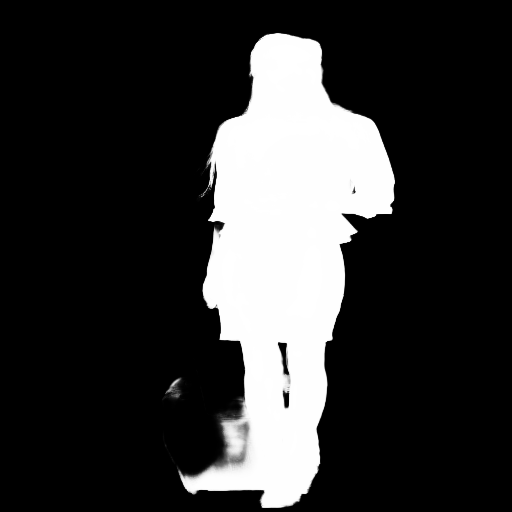

In [43]:
Image.fromarray(((matte * 255).astype('uint8')), mode='L')

In [63]:
ref_size = 512
im_h = 324
im_w = 200
if max(im_h, im_w) < ref_size or min(im_h, im_w) > ref_size:
    if im_w >= im_h:
        im_rh = ref_size
        im_rw = int(im_w / im_h * ref_size)
    elif im_w < im_h:
        im_rw = ref_size
        im_rh = int(im_h / im_w * ref_size)
else:
    im_rh = im_h
    im_rw = im_w

im_rw = im_rw - im_rw % 32
im_rh = im_rh - im_rh % 32
print(im_rh, im_rw)

800 512


In [65]:
img.shape

torch.Size([3, 512, 512])